In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Assuming you have already preprocessed the data as in the first code snippet
# Load your preprocessed dataframe
df = pd.read_csv("AmazonDataSales.csv")  # use your CSV file path here

C:\Users\ander\AppData\Local\Temp\ipykernel_28540\2358491391.py:10: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AmazonDataSales.csv")  # use your CSV file path here


In [2]:
# Convert 'Date' to datetime and extract 'Year' and 'Month'
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [3]:
# Drop columns that are not needed or problematic
columns_to_drop = ['Unnamed: 22', 'Order ID', 'Date', 'promotion-ids', 'ASIN', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'Status', 'Fulfilment', 'Sales Channel']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
# Drop the 'Year' column since it has no variation and won't contribute to the model
df.drop('Year', axis=1, inplace=True)

In [4]:
# Drop rows with NaN in 'Amount'
df.dropna(subset=['Amount'], inplace=True)

In [5]:
print(df.columns)

Index(['index', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU',
       'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount',
       'B2B', 'fulfilled-by', 'Month'],
      dtype='object')


A scatter plot can help you visualize the relationship between two numerical variables. Here, we'll plot different features against Amount to see if there's any apparent correlation.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.describe()

,index,Qty,Amount,Month
count,121180.000000,121180.000000,121180.000000,121180.000000
mean,64483.115877,0.961231,648.561465,4.909407
std,37222.531993,0.214354,281.211687,0.818261
min,0.000000,0.000000,0.000000,3.000000
25%,32285.750000,1.000000,449.000000,4.000000
50%,64474.500000,1.000000,605.000000,5.000000
75%,96680.250000,1.000000,788.000000,6.000000
max,128974.000000,8.000000,5584.000000,6.000000


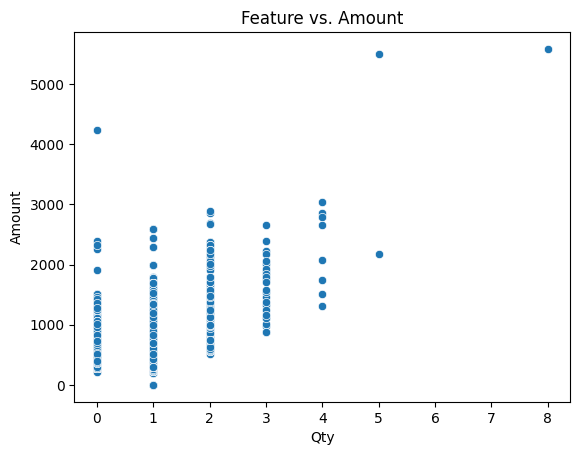

In [10]:
# Replace 'feature_name' with the name of the feature you're interested in
sns.scatterplot(data=df, x='Qty', y='Amount')
plt.title('Feature vs. Amount')
plt.show()


A pair plot provides pairwise scatter plots for multiple features. This is useful for a quick overview of how each feature relates to others, including Amount.

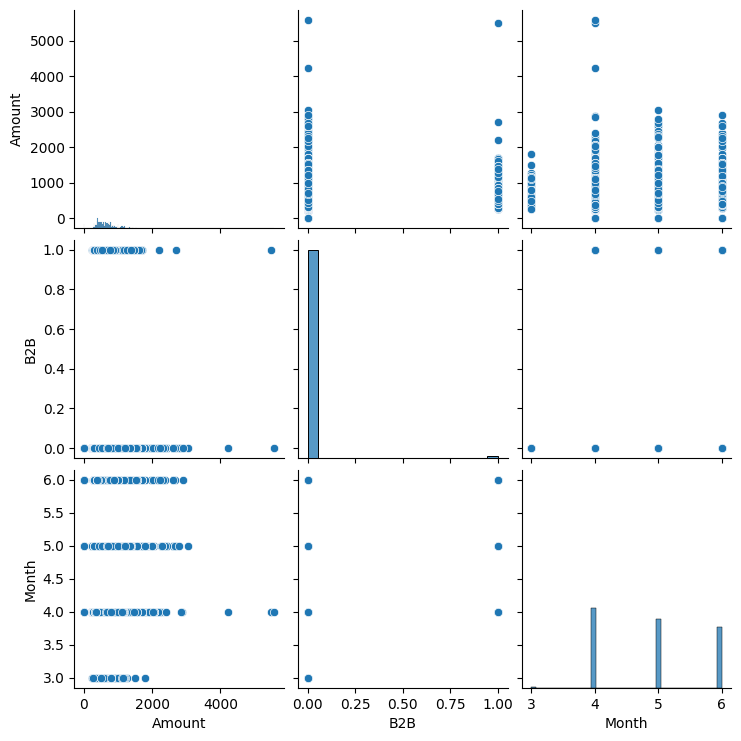

In [11]:
# Select a subset of features to avoid cluttering, including 'Amount'
features = ['Amount', 'B2B', 'Category', 'Month']  # Replace with actual feature names
sns.pairplot(df[features])
plt.show()


A heatmap of correlation values can help identify which features are most linearly related to Amount.

In [12]:
# Select only numeric columns for correlation calculation
# Handle Non-Numeric Columns & Calculate Correlations for Numeric and Boolean Columns Only
numeric_and_boolean_df = df.select_dtypes(include=['int64', 'float64', 'bool', 'int32'])


# Calculate correlations on numeric dataframe
corr_matrix = numeric_and_boolean_df.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt


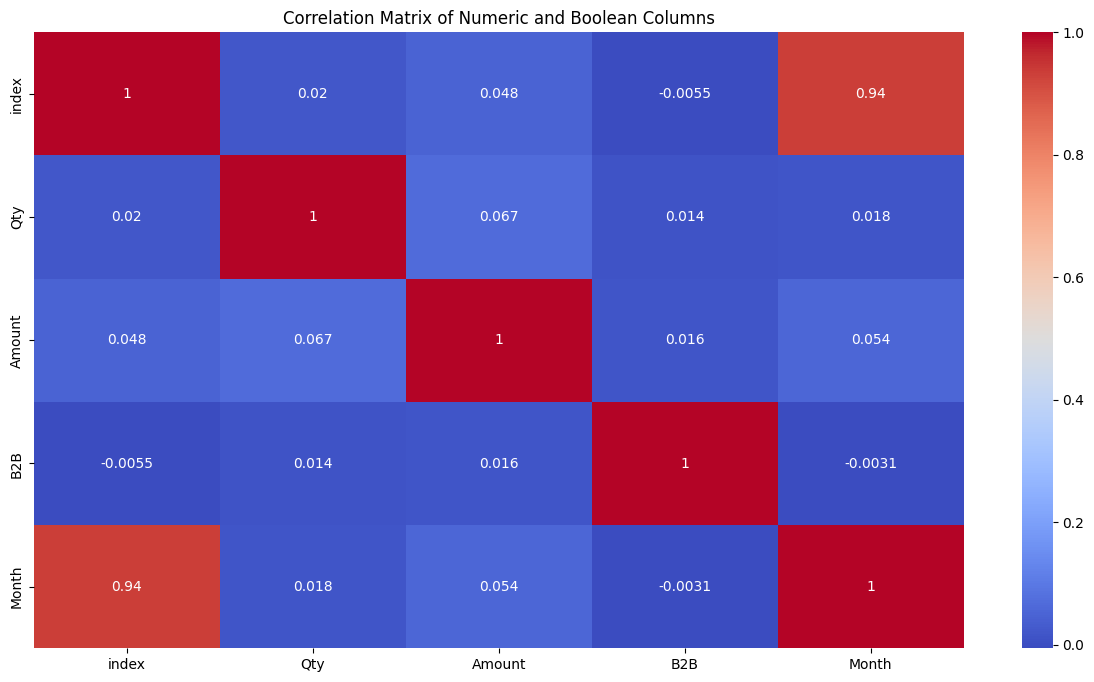

In [13]:
# Plot the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric and Boolean Columns')
plt.show()

Box Plot
Box plots are great for visualizing the distribution of Amount across different categories of a feature.

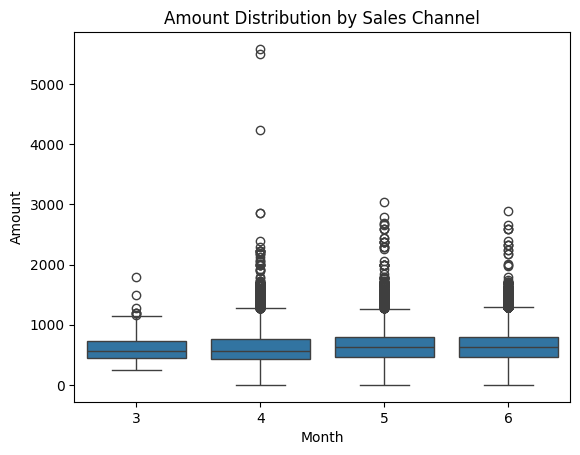

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='Month', y='Amount')
plt.title('Amount Distribution by Sales Channel')
plt.show()

Distribution Plot
To understand the distribution of Amount, a histogram or a KDE (Kernel Density Estimate) plot can be useful.
It's good for identifying multicollinearity and the relationship between features and the target variable.

In [15]:
# View correlation with 'Amount' specifically, if 'Amount' is a column in your DataFrame
# If 'Amount' is a column, view its correlations
if 'Amount' in numeric_and_boolean_df.columns:
    print(corr_matrix['Amount'].sort_values(ascending=False))


Amount    1.000000
Qty       0.066900
Month     0.053925
index     0.047571
B2B       0.015706
Name: Amount, dtype: float64


Remove Highly Correlated Features

To avoid multicollinearity, you might want to remove features that are highly correlated with each other (e.g., correlation coefficient above 0.8 or below -0.8).

In [16]:
import numpy as np

# Assuming df is your DataFrame already loaded

# Ensure that your DataFrame includes only relevant numeric columns for correlation analysis.
# Other columns like 'index', 'Qty', 'Year', and 'Month' might also be relevant if they're not identifiers.

# Create correlation matrix for numeric columns only
corr_matrix = df.select_dtypes(include=['int64', 'float64', 'int32']).corr().abs()

# Step 2: Identify Highly Correlated Features to Drop
# Select upper triangle of correlation matrix to avoid redundancy
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]




A sample machine learning algorithm that fails at its prediction. You can play around with it and try different models if you like. 

In [17]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'df' is your DataFrame and you're about to start preprocessing
# Make sure to drop rows with NaN in 'Amount' first to align 'y'
df = df.dropna(subset=['Amount'])

# Now split 'df' into 'X' and 'y' ensuring they are aligned
X = df.select_dtypes(include=['int64', 'float64', 'int32']).drop(['Amount'], axis=1)
y = df['Amount']

# Define transformations for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])
  # Using RobustScaler instead of StandardScaler

# Define transformations for categorical columns
categorical_features = X.select_dtypes(include=['object', 'bool']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine transformations
# Apply transformations
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, X.columns)])


# Create a pipeline to combine preprocessing, feature selection, and regression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression, k='all')),  # 'all' keeps all features, adjust 'k' as needed
    ('regressor', LinearRegression())])


# Train the model
model_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline.predict(X_test)

# Check and replace any Inf/-Inf values after preprocessing, if necessary
# This step is skipped as it's assumed preprocessor handles it, but you can include manual checks or transformations here

# Step 4: Evaluate the model
print("R^2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))



R^2 Score: 0.004683206856715971
Mean Squared Error: 78679.31208808908


In [20]:
# Konstanter för den logistiska funktionen
L = 100  # Mättnadsvärde
k = 1    # Lutningskonstant
x0 = 15
  # x-värdet vid kurvans mitt

# Beräkna y vid x = 5 och x = 15
x_values = [5, 15, 20]
y_values = [L / (1 + np.exp(-k * (x - x0))) for x in x_values]

y_values


[0.0045397868702434395, 50.0, 99.33071490757152]